In [1]:
#import the necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
#load the data
df=pd.read_csv(r"D:\admission_data.csv")
df.head(5)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    float64
 1   TOEFL Score        500 non-null    float64
 2   University Rating  500 non-null    float64
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    float64
 7   Chance of Admit    500 non-null    float64
dtypes: float64(8)
memory usage: 31.4 KB


In [27]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.529440,0.542571,0.528500,0.593500,0.621000,0.569372,0.560000,0.605937
std,0.225903,0.217210,0.285878,0.247751,0.231362,0.193850,0.496884,0.224032
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.360000,0.392857,0.250000,0.375000,0.500000,0.425481,0.000000,0.460317
50%,0.540000,0.535714,0.500000,0.625000,0.625000,0.564103,1.000000,0.603175
75%,0.700000,0.714286,0.750000,0.750000,0.750000,0.717949,1.000000,0.761905
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

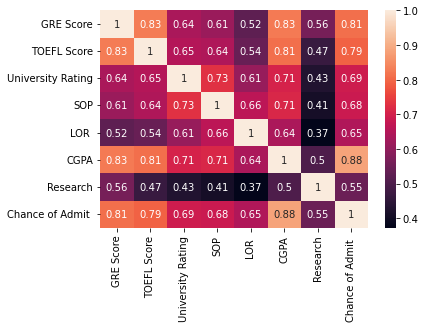

In [4]:
#correlation among data
sns.heatmap(df.corr(),annot=True)

In [12]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [13]:
#split the data
X = df.drop('Chance of Admit ', axis =1)
y = df['Chance of Admit ']

In [14]:
#scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit ']
df[features] = scaler.fit_transform(df[features])
df[features]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0,0.920635
1,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0,0.666667
2,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0,0.603175
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0,0.730159
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0,0.492063
...,...,...,...,...,...,...,...,...
495,0.84,0.571429,1.00,0.875,0.750,0.711538,1.0,0.841270
496,0.94,0.892857,1.00,1.000,1.000,0.983974,1.0,0.984127
497,0.80,1.000000,1.00,0.875,1.000,0.884615,1.0,0.936508
498,0.44,0.392857,0.75,0.750,1.000,0.522436,0.0,0.619048


In [120]:
#split the data
from sklearn.model_selection import train_test_split as splitdata
X_train, X_test, y_train, y_test = splitdata(X, y, test_size = 0.2, random_state = 60 )

In [121]:
#fit the model
from sklearn.linear_model import LinearRegression 
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [122]:
y_pred=lr.predict(X_test)



In [123]:
#Evaluating Model
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.850161612297693

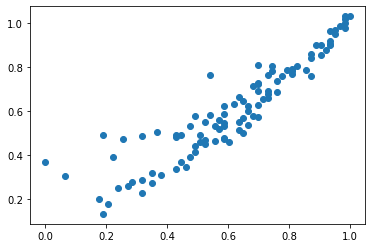

In [125]:
# Visualising results
plt.scatter(y_test,y_pred)

